## Set-Up

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [2]:
# Get Adj Close column
df_adjclose_aapl = pd.read_csv('../../data/clean/baseline_transformed_dataset.csv', header=0, index_col=0)
df_adjclose_aapl.head()

,AAPL(t-1),AAPL(t)
Date,,
2015-01-05,24.320435,23.635284
2015-01-06,23.635284,23.637510
2015-01-07,23.637510,23.968960
2015-01-08,23.968960,24.889904
2015-01-09,24.889904,24.916597


In [4]:
# Train Test Split
X = df_adjclose_aapl.drop('AAPL(t-1)', axis=1)  # Features
y = df_adjclose_aapl['AAPL(t)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False, random_state=42)

## Random Forest

### Training

In [5]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

### Predictions

In [6]:
# Prediction
y_pred = rf_model.predict(X_test)
y_pred = pd.Series(y_pred, index=y_test.index)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print('Mean Absolute Error: %.3f' % mae)
print('Mean Squared Error: %.3f' % mse)

Mean Absolute Error: 16.672
Mean Squared Error: 743.909


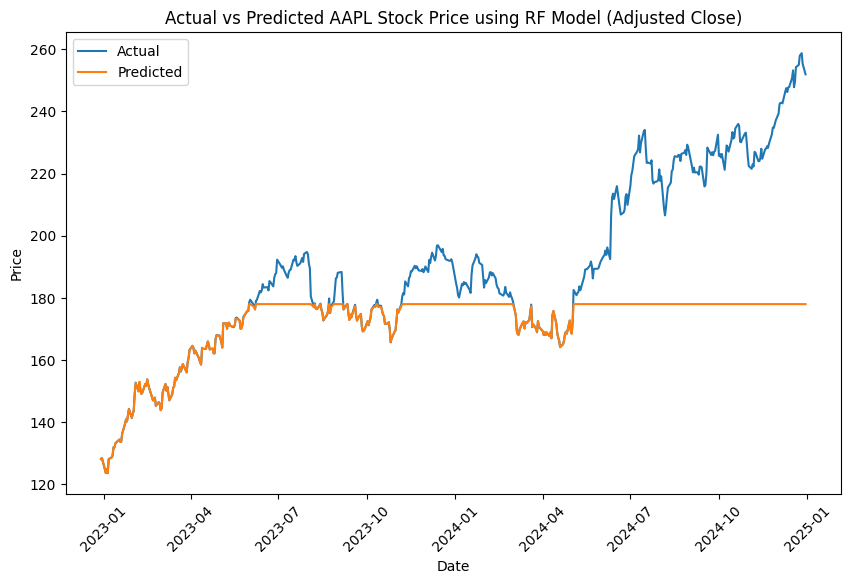

In [12]:
# Plot Test Results
# Convert index to datetime
y_test.index = pd.to_datetime(y_test.index)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test, label = 'Actual')
plt.plot(y_test.index, y_pred, label = 'Predicted')

# Format the x-axis to show quarterly ticks
plt.gca().xaxis.set_major_locator(mdates.MonthLocator((1,4,7,10)))  # Quarterly ticks
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))  # Format as Year-Quarter

# Labels and title
plt.title('Actual vs Predicted AAPL Stock Price using RF Model (Adjusted Close)')
plt.xlabel('Date')
plt.xticks(rotation=45)
plt.ylabel('Price')
plt.legend()
plt.show()